In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 15, 6

In [3]:
data = pd.read_csv('LEADINGDATED.csv')


In [4]:
data.head()



,MONTH,SAFEACTS,SAFECONDITIONS,UNSAFEACT,UNSAFECONDITION,PROCEDURE,PPE,SAFETYOBSERVATIONS,TRIFR
0,2010-04,1836,562,3125,2955,3006,1297,8477,26
1,2010-05,1548,439,2836,2867,2683,1131,7689,22
2,2010-06,1507,401,2810,2921,2691,1124,7639,27
3,2010-07,1414,448,2712,2736,2735,1047,7310,37
4,2010-08,1512,492,2681,2772,2709,1055,7462,22


In [5]:
data.dtypes

MONTH                 object
SAFEACTS               int64
SAFECONDITIONS         int64
UNSAFEACT              int64
UNSAFECONDITION        int64
PROCEDURE              int64
PPE                    int64
SAFETYOBSERVATIONS     int64
TRIFR                  int64
dtype: object

# Reading data as time series

In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('LEADINGDATED.csv', parse_dates=['MONTH'], index_col = 'MONTH') #, index_col='Month',date_parser=dateparse)


In [7]:
data.head()


,SAFEACTS,SAFECONDITIONS,UNSAFEACT,UNSAFECONDITION,PROCEDURE,PPE,SAFETYOBSERVATIONS,TRIFR
MONTH,,,,,,,,
2010-04-01,1836,562,3125,2955,3006,1297,8477,26
2010-05-01,1548,439,2836,2867,2683,1131,7689,22
2010-06-01,1507,401,2810,2921,2691,1124,7639,27
2010-07-01,1414,448,2712,2736,2735,1047,7310,37
2010-08-01,1512,492,2681,2772,2709,1055,7462,22


In [8]:
data.index

DatetimeIndex(['2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01',
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
               '2013-12-01'],
              dtype='datetime64[ns]', name='MONTH', freq=None)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [10]:
data_l1 = data

# Using Pre-built normalizer

In [11]:
data_l1n = preprocessing.normalize(data_l1, norm='l1')

In [12]:
data_l1n

array([[0.08626198, 0.02640481, 0.14682391, 0.13883668, 0.14123285,
        0.06093779, 0.3982804 , 0.00122157],
       [0.08056206, 0.02284673, 0.14759303, 0.14920635, 0.1396305 ,
        0.05886027, 0.40015613, 0.00114494],
       [0.07881799, 0.0209728 , 0.14696653, 0.15277197, 0.14074268,
        0.05878661, 0.39952929, 0.00141213],
       [0.07668529, 0.02429633, 0.14707956, 0.14838115, 0.14832692,
        0.05678182, 0.39644232, 0.00200662],
       [0.080834  , 0.02630313, 0.14333066, 0.14819567, 0.14482759,
        0.05640203, 0.39893077, 0.00117616],
       [0.07514655, 0.02132606, 0.14554275, 0.15362846, 0.14837275,
        0.05902567, 0.39564382, 0.00131393],
       [0.07707225, 0.02000222, 0.14350621, 0.15497562, 0.1470523 ,
        0.06089317, 0.39555629, 0.00094193],
       [0.0811667 , 0.02068017, 0.14081645, 0.15271054, 0.15366685,
        0.05462913, 0.39531409, 0.00101608],
       [0.08618893, 0.01986971, 0.13954397, 0.1495114 , 0.15289902,
        0.05570033, 0.395114

<h1>Shapiro Wilk</h1>

In [14]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('(fail to reject H0)')
else:
	print('(reject H0)')

Statistics=0.760, p=0.000
(reject H0)


# Plotting data

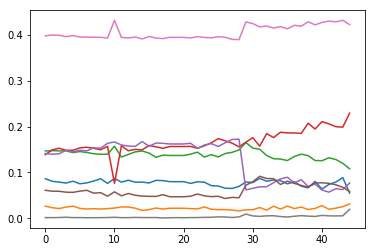

In [12]:
plt.plot(data_l1n)

In [13]:
from statsmodels.tsa.stattools import adfuller


# Taking Rolling mean

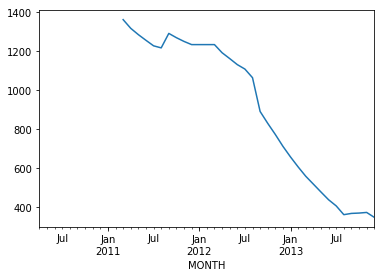

In [14]:
data['Rolling_Mean'] = data['SAFEACTS'].rolling(window = 12).mean().plot()



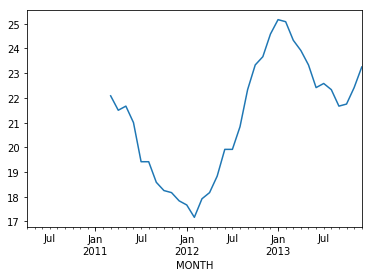

In [15]:
data['Rolling_Mean'] = data['TRIFR'].rolling(window = 12).mean().plot()


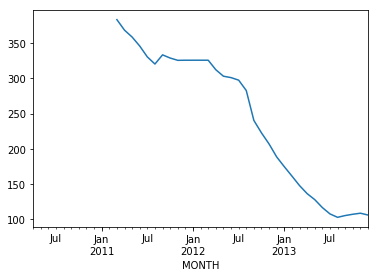

In [16]:
data['Rolling_Mean'] = data['SAFECONDITIONS'].rolling(window = 12).mean().plot()


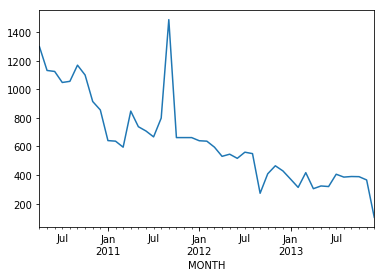

In [17]:
data.PPE.plot()
plt.show()

# Performing Augmented Dickey Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.PPE, maxlag = 1)
adf[0]

-1.7342748807000798

In [19]:
adf[4]


{'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}

In [20]:
ts_log = np.log(data.PPE)


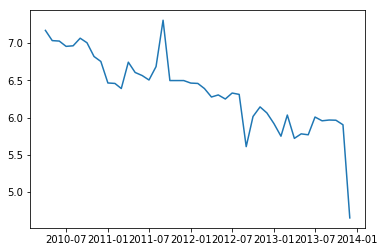

In [21]:
plt.plot(ts_log)


In [22]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

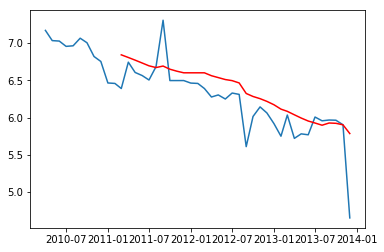

In [23]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [24]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.451505
Name: PPE, dtype: float64

# Applying first difference

In [25]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

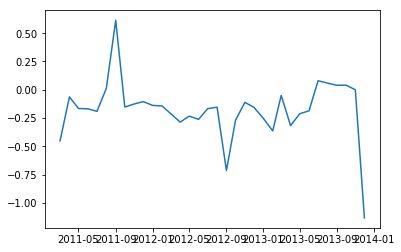

In [26]:
plt.plot(ts_log_moving_avg_diff)

# Again applying Augmented Dickey Fuller test

In [27]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-3.809876919418817

In [28]:
adf[4]

{'1%': -3.6461350877925254,
 '5%': -2.954126991123355,
 '10%': -2.6159676124885216}

In [29]:
#safeacts

In [30]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.SAFEACTS, maxlag = 1)
adf[0]

-1.435714131227255

In [31]:
adf[4]

{'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}

In [32]:
ts_log = np.log(data.SAFEACTS)

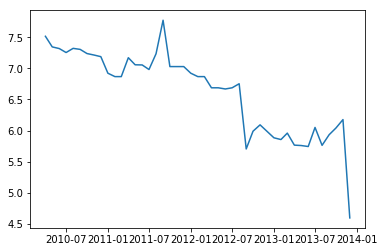

In [33]:
plt.plot(ts_log)

In [34]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

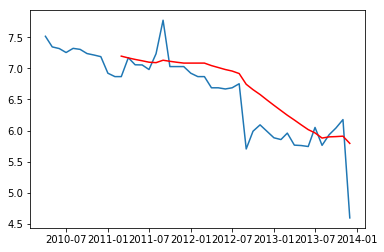

In [35]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [36]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.329113
Name: SAFEACTS, dtype: float64

In [37]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

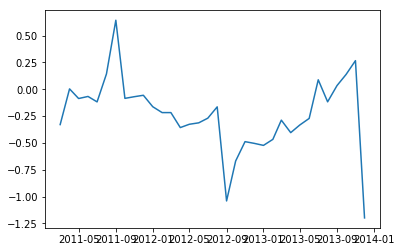

In [38]:
plt.plot(ts_log_moving_avg_diff)

In [39]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-3.062005161502864

In [40]:
adf[4]


{'1%': -3.6461350877925254,
 '5%': -2.954126991123355,
 '10%': -2.6159676124885216}

In [41]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.SAFEACTS, maxlag = 1)
adf[0]

-1.435714131227255

In [42]:
#safeconditions

In [43]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.SAFECONDITIONS, maxlag = 1)
adf[0]

-2.328394886346658

In [44]:
adf[4]

{'1%': -3.5885733964124715,
 '5%': -2.929885661157025,
 '10%': -2.6031845661157025}

In [45]:
ts_log = np.log(data.SAFECONDITIONS)


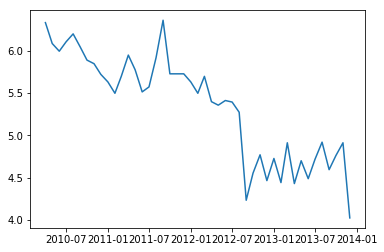

In [46]:
plt.plot(ts_log)


In [47]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

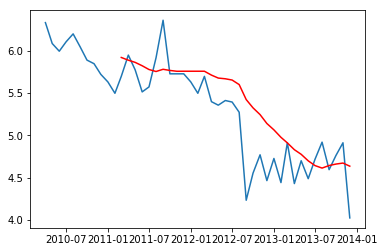

In [48]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [49]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.222852
Name: SAFECONDITIONS, dtype: float64

In [50]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

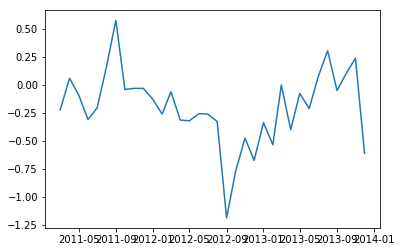

In [51]:
plt.plot(ts_log_moving_avg_diff)

In [52]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-3.2052764592350664

In [53]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

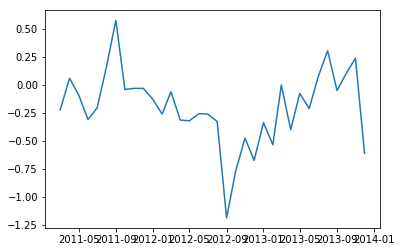

In [54]:
plt.plot(ts_log_moving_avg_diff)

In [55]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-3.2052764592350664

In [56]:
#UNSAFE CONDITIONS

In [57]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.UNSAFECONDITION, maxlag = 1)
adf[0]

-1.5930145603163561

In [58]:
adf[4]


{'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}

In [59]:
ts_log = np.log(data.UNSAFECONDITION)

In [60]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

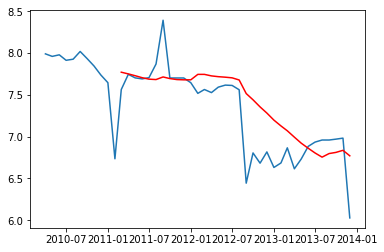

In [61]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [62]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.206963
Name: UNSAFECONDITION, dtype: float64

In [63]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

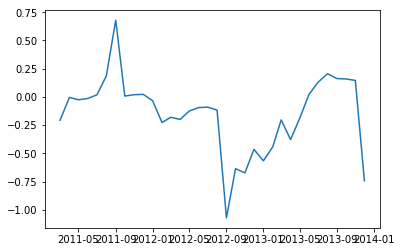

In [64]:
plt.plot(ts_log_moving_avg_diff)

In [65]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-2.5523291869668565

In [67]:

#UNSAFE ACT

In [68]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.UNSAFEACT, maxlag = 1)
adf[0]

-1.2845835560472953

In [69]:
adf[4]

{'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}

In [70]:
ts_log = np.log(data.UNSAFEACT)


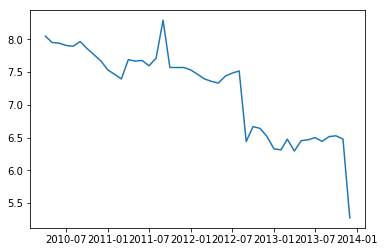

In [71]:
plt.plot(ts_log)

In [72]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

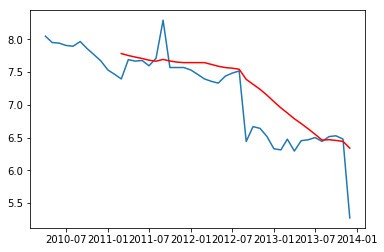

In [73]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [74]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.387599
Name: UNSAFEACT, dtype: float64

In [75]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

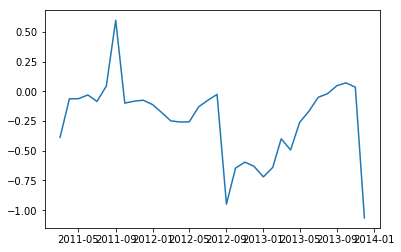

In [76]:
plt.plot(ts_log_moving_avg_diff)

In [77]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-2.590769785471824

In [78]:
#PROCEDURE

In [79]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.PROCEDURE, maxlag = 1)
adf[0]

-1.1821184039162769

In [80]:
adf[4]

{'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}

In [81]:
ts_log = np.log(data.PROCEDURE)


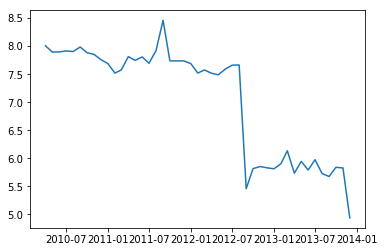

In [82]:
plt.plot(ts_log)

In [83]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

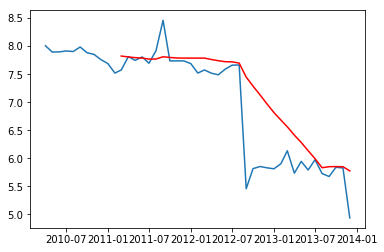

In [84]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [85]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.248573
Name: PROCEDURE, dtype: float64

In [86]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

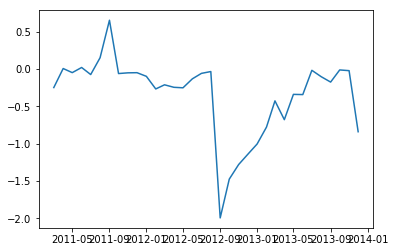

In [87]:
plt.plot(ts_log_moving_avg_diff)

In [88]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-2.4594110932408175

In [89]:
#SAFETY OBSERVATIONS

In [90]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.SAFETYOBSERVATIONS, maxlag = 1)
adf[0]

-1.3400072076386182

In [91]:
adf[4]

{'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}

In [92]:
ts_log = np.log(data.SAFETYOBSERVATIONS)

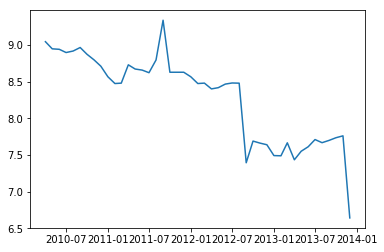

In [93]:
plt.plot(ts_log)

In [94]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

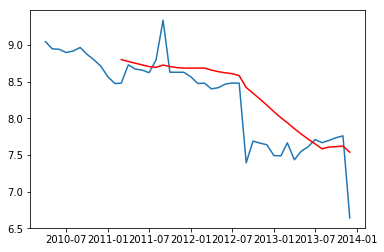

In [95]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [96]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.321877
Name: SAFETYOBSERVATIONS, dtype: float64

In [97]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

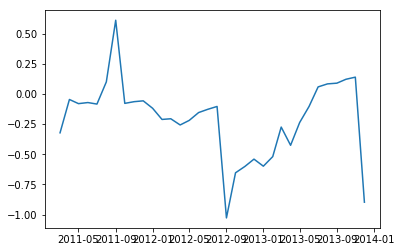

In [98]:
plt.plot(ts_log_moving_avg_diff)

In [99]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-2.739337575879638

In [100]:
#TRIFR

In [101]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.TRIFR, maxlag = 1)
adf[0]

-3.5562158181631145

In [102]:
adf[4]

{'1%': -3.5885733964124715,
 '5%': -2.929885661157025,
 '10%': -2.6031845661157025}

In [103]:
ts_log = np.log(data.TRIFR)

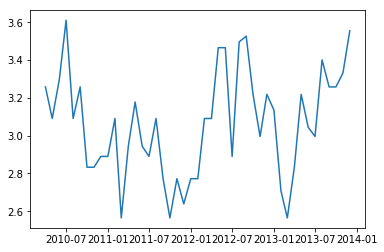

In [104]:
plt.plot(ts_log)


In [105]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

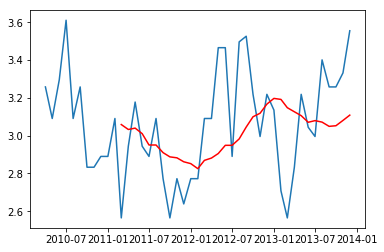

In [106]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [107]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.494067
Name: TRIFR, dtype: float64

In [108]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

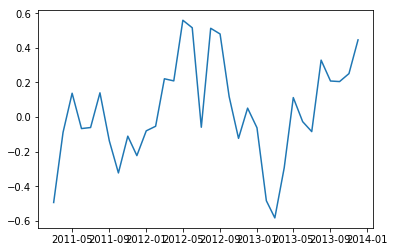

In [109]:
plt.plot(ts_log_moving_avg_diff)

In [110]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-3.0885927590477156

# Using autocorrelation function

In [17]:
from statsmodels.tsa.stattools import acf, pacf


In [225]:
lag_acf = acf(ts_log_moving_avg_diff, nlags=20)


C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [226]:
lag_pacf = pacf(ts_log_moving_avg_diff, nlags=20, method='ols')


Text(0.5, 1.0, 'Autocorrelation Function')

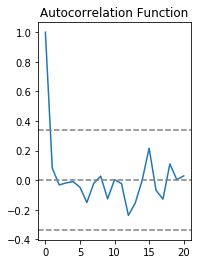

In [227]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Using partial autocorrelaton function

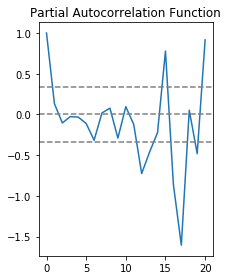

In [228]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARIMA model

In [112]:
from statsmodels.tsa.arima_model import ARIMA


C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

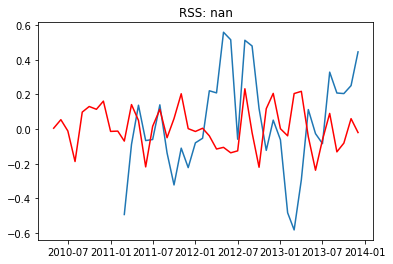

In [113]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_moving_avg_diff)**2))

C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

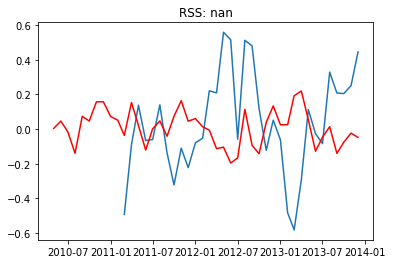

In [114]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_moving_avg_diff)**2))

C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: nan')

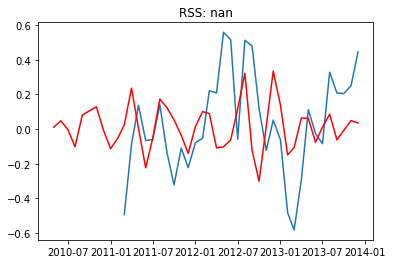

In [115]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_moving_avg_diff)**2))

In [116]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

MONTH
2010-05-01    0.011291
2010-06-01    0.047916
2010-07-01   -0.002460
2010-08-01   -0.102135
2010-09-01    0.080588
dtype: float64


In [117]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

MONTH
2010-05-01    0.011291
2010-06-01    0.059206
2010-07-01    0.056747
2010-08-01   -0.045389
2010-09-01    0.035199
dtype: float64


In [118]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


MONTH
2010-04-01    3.258097
2010-05-01    3.269387
2010-06-01    3.317303
2010-07-01    3.314843
2010-08-01    3.212708
dtype: float64

Text(0.5, 1.0, 'RMSE: 681.8369')

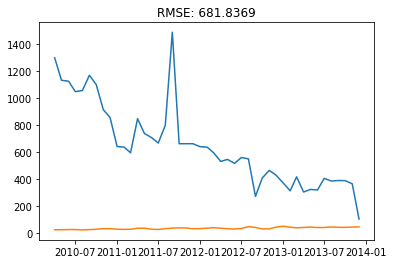

In [119]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data.PPE)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data.PPE)**2)/len(data.PPE)))

# Plotting Auto-correlation function graph

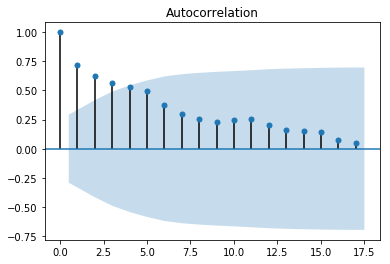

In [18]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

d=data.PPE
plot_acf(d)
pyplot.show()

# the pre defined ACF function

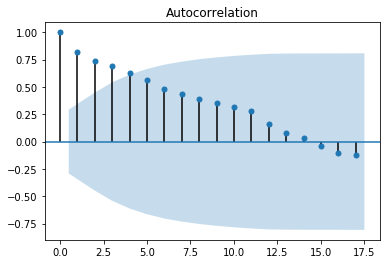

In [121]:
d=data.PROCEDURE
plot_acf(d)
pyplot.show()

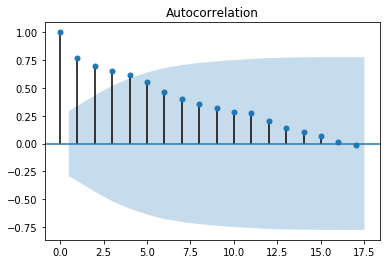

In [22]:
d=data.SAFEACTS
plot_acf(d)
pyplot.show()

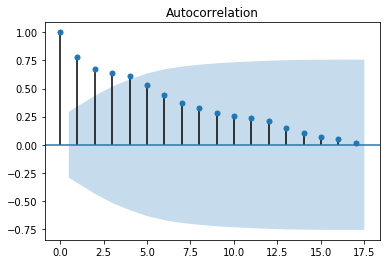

In [23]:
d=data.SAFECONDITIONS
plot_acf(d)
pyplot.show()

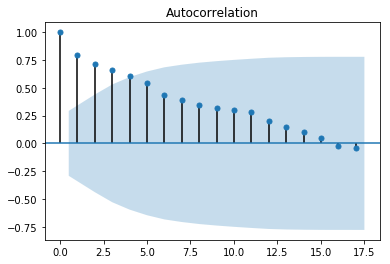

In [24]:
d=data.UNSAFEACT
plot_acf(d)
pyplot.show()

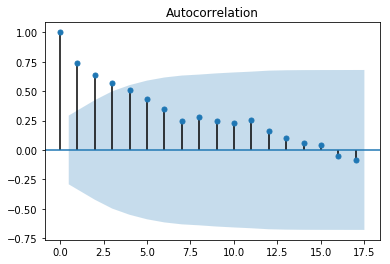

In [25]:
d=data.UNSAFECONDITION
plot_acf(d)
pyplot.show()

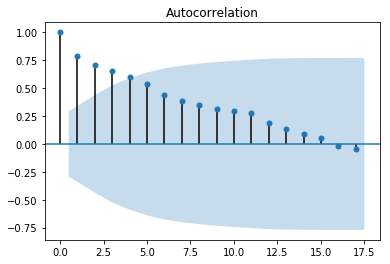

In [26]:
d=data.SAFETYOBSERVATIONS
plot_acf(d)
pyplot.show()

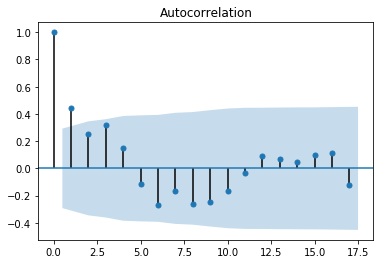

In [27]:
d=data.TRIFR
plot_acf(d)
pyplot.show()

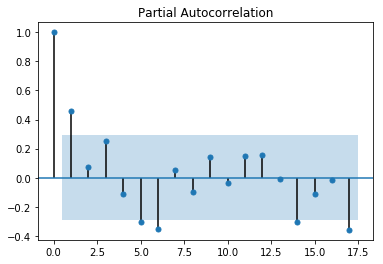

In [28]:
plot_pacf(d)
pyplot.show()

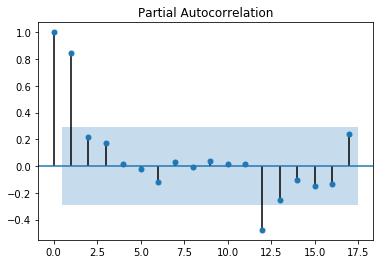

In [29]:
d=data.PROCEDURE
plot_pacf(d)
pyplot.show()

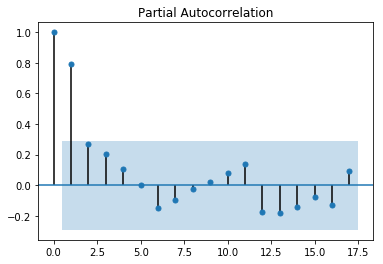

In [30]:
d=data.SAFEACTS
plot_pacf(d)
pyplot.show()

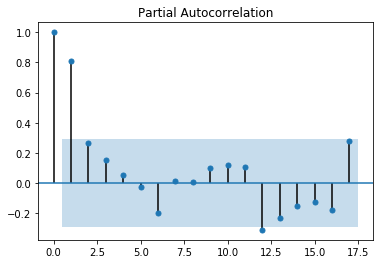

In [31]:
d=data.UNSAFEACT
plot_pacf(d)
pyplot.show()

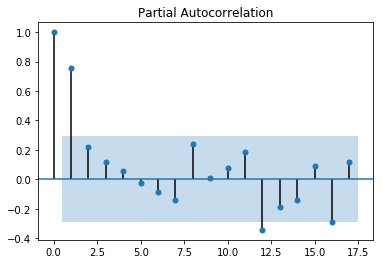

In [32]:
d=data.UNSAFECONDITION
plot_pacf(d)
pyplot.show()

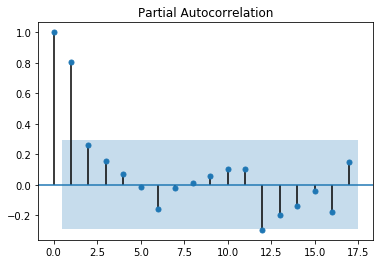

In [33]:
d=data.SAFETYOBSERVATIONS
plot_pacf(d)
pyplot.show()

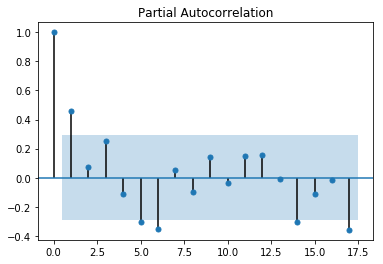

In [34]:
d=data.TRIFR
plot_pacf(d)
pyplot.show()

In [20]:
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#dividing data into testing and validating set

In [21]:
from statsmodels.tsa.vector_ar.var_model import VAR


# Using VAR model

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

In [ ]:
mdata = sm.datasets.macrodata.load_pandas().data

In [ ]:
 data = np.log(data_l1n)

model

In [36]:
model = VAR(data)

In [37]:
results = model.fit(2)

# Result summary

In [331]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 11, Jun, 2020
Time:                     20:24:20
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -35.9755
Nobs:                     43.0000    HQIC:                  -39.4917
Log likelihood:           541.121    FPE:                1.30356e-18
AIC:                     -41.5458    Det(Omega_mle):     9.07128e-20
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const       -20.471902         6.830020           -2.997           0.003
L1.y1        -0.523720         0.297169           -1.762           0.078
L1.y2        -0.004323         0.163485           -0.026           0.979
L1.y3         0.337660

In [138]:
from statsmodels.tsa.stattools import grangercausalitytests

In [139]:
data = pd.read_csv('LEADINGDATED.csv')


In [140]:
data.head()

,MONTH,SAFEACTS,SAFECONDITIONS,UNSAFEACT,UNSAFECONDITION,PROCEDURE,PPE,SAFETYOBSERVATIONS,TRIFR
0,2010-04,1836,562,3125,2955,3006,1297,8477,26
1,2010-05,1548,439,2836,2867,2683,1131,7689,22
2,2010-06,1507,401,2810,2921,2691,1124,7639,27
3,2010-07,1414,448,2712,2736,2735,1047,7310,37
4,2010-08,1512,492,2681,2772,2709,1055,7462,22


In [141]:
a= data.PPE

In [142]:
b= data.TRIFR

In [143]:
a[0]

1297

# Applying Granger causality tests

In [144]:
grangercausalitytests([[a[i], b[i]] for i in range(0, len(a))], 4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9841  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9835  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9835  , df=1
parameter F test:         F=0.0004  , p=0.9841  , df_denom=41, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2666  , p=0.7674  , df_denom=38, df_num=2
ssr based chi2 test:   chi2=0.6034  , p=0.7396  , df=2
likelihood ratio test: chi2=0.5992  , p=0.7411  , df=2
parameter F test:         F=0.2666  , p=0.7674  , df_denom=38, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2280  , p=0.8763  , df_denom=35, df_num=3
ssr based chi2 test:   chi2=0.8207  , p=0.8445  , df=3
likelihood ratio test: chi2=0.8128  , p=0.8464  , df=3
parameter F test:         F=0.2280  , p=0.8763  , df_denom=35, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2673  , p=0.8968  , df_d

{1: ({'ssr_ftest': (0.0004003770221391544, 0.9841329177446969, 41.0, 1),
   'ssr_chi2test': (0.000429672901807873, 0.983462192057523, 1),
   'lrtest': (0.0004296708038964425, 0.9834622324253584, 1),
   'params_ftest': (0.0004003770221318149, 0.9841329177448773, 41.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.26662763712026494, 0.7673792356045167, 38.0, 2),
   'ssr_chi2test': (0.6034204419037575, 0.7395523406150237, 2),
   'lrtest': (0.5992257297291417, 0.7411050729656261, 2),
   'params_ftest': (0.26662763712024434, 0.7673792356045315, 38.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.22798562502444003, 0.876279085025204, 35.0, 3),
   'ssr_chi2test': (0.820748250087984, 0.8444981592935368, 3),
   'lrtest': (0.8128318396220493, 0.8463954288920021, 3),
   'params_ftest': (0.22798562502447975, 0.8762790850251757, 35.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

In [145]:
# Small p-value means
#we reject the restricted model, which means the effect of the lagged
#values of the other variable is statistically significant.


In [146]:
a1= data.PROCEDURE
b1= data.TRIFR

In [147]:
grangercausalitytests([[a1[i], b1[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2470  , p=0.6218  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.2651  , p=0.6066  , df=1
likelihood ratio test: chi2=0.2643  , p=0.6072  , df=1
parameter F test:         F=0.2470  , p=0.6218  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.24700833631198982, 0.6218442156203297, 41.0, 1),
   'ssr_chi2test': (0.26508211701774514, 0.6066499737256283, 1),
   'lrtest': (0.26428680370349866, 0.6071902411013049, 1),
   'params_ftest': (0.24700833631199992, 0.6218442156203265, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [148]:
a2= data.SAFEACTS
b2= data.TRIFR

In [149]:
grangercausalitytests([[a2[i], b2[i]] for i in range(0, len(a))], 4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0933  , p=0.7615  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1001  , p=0.7517  , df=1
likelihood ratio test: chi2=0.1000  , p=0.7518  , df=1
parameter F test:         F=0.0933  , p=0.7615  , df_denom=41, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0973  , p=0.9075  , df_denom=38, df_num=2
ssr based chi2 test:   chi2=0.2202  , p=0.8957  , df=2
likelihood ratio test: chi2=0.2197  , p=0.8960  , df=2
parameter F test:         F=0.0973  , p=0.9075  , df_denom=38, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1349  , p=0.9386  , df_denom=35, df_num=3
ssr based chi2 test:   chi2=0.4855  , p=0.9221  , df=3
likelihood ratio test: chi2=0.4827  , p=0.9227  , df=3
parameter F test:         F=0.1349  , p=0.9386  , df_denom=35, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0882  , p=0.9855  , df_d

{1: ({'ssr_ftest': (0.09331691922874641, 0.7615475822612056, 41.0, 1),
   'ssr_chi2test': (0.1001449864893864, 0.7516557139345375, 1),
   'lrtest': (0.10003119300381513, 0.7517922044368812, 1),
   'params_ftest': (0.09331691922875725, 0.7615475822611999, 41.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.09731942393901287, 0.9074915419326988, 38.0, 2),
   'ssr_chi2test': (0.22024922259881863, 0.8957225111958302, 2),
   'lrtest': (0.21968707484472816, 0.8959743107802938, 2),
   'params_ftest': (0.09731942393900087, 0.9074915419327084, 38.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.13486130299124874, 0.9385980499155477, 35.0, 3),
   'ssr_chi2test': (0.48550069076849545, 0.9220651026700296, 3),
   'lrtest': (0.48271604729893625, 0.9226718779835384, 3),
   'params_ftest': (0.13486130299124985, 0.9385980499155477, 35.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [150]:
a3= data.SAFECONDITIONS
b3= data.TRIFR

In [151]:
grangercausalitytests([[a3[i], b3[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1295  , p=0.7208  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1389  , p=0.7094  , df=1
likelihood ratio test: chi2=0.1387  , p=0.7096  , df=1
parameter F test:         F=0.1295  , p=0.7208  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.129451296048711, 0.720848347862531, 41.0, 1),
   'ssr_chi2test': (0.1389233421010557, 0.7093537104530898, 1),
   'lrtest': (0.13870448793028345, 0.7095723382458834, 1),
   'params_ftest': (0.12945129604870712, 0.7208483478625405, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [152]:
a4= data.UNSAFEACT
b4= data.TRIFR

In [153]:
grangercausalitytests([[a4[i], b4[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0944  , p=0.7602  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1014  , p=0.7502  , df=1
likelihood ratio test: chi2=0.1012  , p=0.7504  , df=1
parameter F test:         F=0.0944  , p=0.7602  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.09444116458721745, 0.7601608834776274, 41.0, 1),
   'ssr_chi2test': (0.1013514937033553, 0.7502137774327273, 1),
   'lrtest': (0.10123494394997579, 0.7503526561558679, 1),
   'params_ftest': (0.09444116458723, 0.7601608834776106, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [154]:
a5= data.UNSAFECONDITION
b5= data.TRIFR

In [155]:
grangercausalitytests([[a5[i], b5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0180  , p=0.8939  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0193  , p=0.8895  , df=1
likelihood ratio test: chi2=0.0193  , p=0.8895  , df=1
parameter F test:         F=0.0180  , p=0.8939  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.017998373835047765, 0.8939340234681967, 41.0, 1),
   'ssr_chi2test': (0.01931532801810004, 0.8894662728364866, 1),
   'lrtest': (0.019311089691427696, 0.8894783227371086, 1),
   'params_ftest': (0.017998373835046228, 0.8939340234681967, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [156]:
a6= data.SAFETYOBSERVATIONS
b6= data.TRIFR

In [157]:
grangercausalitytests([[a6[i], b6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0906  , p=0.7650  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0972  , p=0.7552  , df=1
likelihood ratio test: chi2=0.0971  , p=0.7554  , df=1
parameter F test:         F=0.0906  , p=0.7650  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.09055773342968423, 0.7649901481718124, 41.0, 1),
   'ssr_chi2test': (0.0971839090464904, 0.7552355887754063, 1),
   'lrtest': (0.09707674054652671, 0.755366268506721, 1),
   'params_ftest': (0.09055773342968014, 0.7649901481718124, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [158]:
grangercausalitytests([[a[i], a1[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5516  , p=0.4619  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.5919  , p=0.4417  , df=1
likelihood ratio test: chi2=0.5880  , p=0.4432  , df=1
parameter F test:         F=0.5516  , p=0.4619  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.5515572179571266, 0.4619162160171154, 41.0, 1),
   'ssr_chi2test': (0.5919150631735018, 0.44167952970187807, 1),
   'lrtest': (0.5879690108470186, 0.44320556600351524, 1),
   'params_ftest': (0.5515572179571087, 0.4619162160171211, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [159]:
grangercausalitytests([[a[i], a2[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6962  , p=0.4089  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.7472  , p=0.3874  , df=1
likelihood ratio test: chi2=0.7409  , p=0.3894  , df=1
parameter F test:         F=0.6962  , p=0.4089  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.69624173132949, 0.40888497006314783, 41.0, 1),
   'ssr_chi2test': (0.747186248256038, 0.3873685460264953, 1),
   'lrtest': (0.7409129944396682, 0.38936857033537475, 1),
   'params_ftest': (0.6962417313294442, 0.40888497006316527, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [160]:
grangercausalitytests([[a[i], a3[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9540  , p=0.0118  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=7.4629  , p=0.0063  , df=1
likelihood ratio test: chi2=6.8935  , p=0.0087  , df=1
parameter F test:         F=6.9540  , p=0.0118  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (6.954039125734832, 0.011760120893341672, 41.0, 1),
   'ssr_chi2test': (7.462871256886161, 0.0062984466250683695, 1),
   'lrtest': (6.89352256015809, 0.008650863005811757, 1),
   'params_ftest': (6.954039125728176, 0.011760120893378958, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [161]:
grangercausalitytests([[a[i], a4[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0162  , p=0.3193  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=1.0906  , p=0.2963  , df=1
likelihood ratio test: chi2=1.0773  , p=0.2993  , df=1
parameter F test:         F=1.0162  , p=0.3193  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (1.0162167104615978, 0.3193306811964239, 41.0, 1),
   'ssr_chi2test': (1.0905740307392757, 0.2963440572223055, 1),
   'lrtest': (1.0772779252747569, 0.2993073017203658, 1),
   'params_ftest': (1.0162167104615696, 0.3193306811964312, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [162]:
grangercausalitytests([[a[i], a5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2446  , p=0.6236  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.2625  , p=0.6084  , df=1
likelihood ratio test: chi2=0.2617  , p=0.6090  , df=1
parameter F test:         F=0.2446  , p=0.6236  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.24457722575495477, 0.6235592472798277, 41.0, 1),
   'ssr_chi2test': (0.2624731203223905, 0.6084261564149307, 1),
   'lrtest': (0.26169335459439935, 0.60895917711906, 1),
   'params_ftest': (0.24457722575494692, 0.6235592472798343, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [163]:
grangercausalitytests([[a[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8385  , p=0.3652  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.8998  , p=0.3428  , df=1
likelihood ratio test: chi2=0.8908  , p=0.3453  , df=1
parameter F test:         F=0.8385  , p=0.3652  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.8384765585918115, 0.36518737193091266, 41.0, 1),
   'ssr_chi2test': (0.8998285019034075, 0.34282770024781545, 1),
   'lrtest': (0.8907510157011984, 0.3452738709184956, 1),
   'params_ftest': (0.838476558591785, 0.36518737193092066, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [164]:
grangercausalitytests([[a2[i], a3[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3768  , p=0.0734  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=3.6238  , p=0.0570  , df=1
likelihood ratio test: chi2=3.4823  , p=0.0620  , df=1
parameter F test:         F=3.3768  , p=0.0734  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (3.3767632053107506, 0.07337610808108593, 41.0, 1),
   'ssr_chi2test': (3.623843439845684, 0.05695714752606791, 1),
   'lrtest': (3.482332238267418, 0.062027262490396806, 1),
   'params_ftest': (3.376763205310737, 0.0733761080810866, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [165]:
grangercausalitytests([[a2[i], a4[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1486  , p=0.7019  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1594  , p=0.6897  , df=1
likelihood ratio test: chi2=0.1592  , p=0.6899  , df=1
parameter F test:         F=0.1486  , p=0.7019  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.14857333784461285, 0.7018951228633219, 41.0, 1),
   'ssr_chi2test': (0.1594445576869016, 0.6896684145150883, 1),
   'lrtest': (0.15915636090403495, 0.6899344251958563, 1),
   'params_ftest': (0.14857333784462615, 0.7018951228633088, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [166]:
grangercausalitytests([[a2[i], a5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0024  , p=0.9614  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0025  , p=0.9598  , df=1
likelihood ratio test: chi2=0.0025  , p=0.9598  , df=1
parameter F test:         F=0.0024  , p=0.9614  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.002367525912784386, 0.9614287208433882, 41.0, 1),
   'ssr_chi2test': (0.002540759516158853, 0.9597988972086429, 1),
   'lrtest': (0.0025406861616374954, 0.9597994770465402, 1),
   'params_ftest': (0.002367525912787019, 0.9614287208433511, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [167]:
grangercausalitytests([[a2[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2021  , p=0.6554  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.2169  , p=0.6414  , df=1
likelihood ratio test: chi2=0.2164  , p=0.6418  , df=1
parameter F test:         F=0.2021  , p=0.6554  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.20214799923415067, 0.6553606337090644, 41.0, 1),
   'ssr_chi2test': (0.21693931625128365, 0.6413819673304955, 1),
   'lrtest': (0.2164062646190814, 0.6417919139898915, 1),
   'params_ftest': (0.20214799923416585, 0.6553606337090534, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [168]:
grangercausalitytests([[a3[i], a4[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0191  , p=0.8908  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0205  , p=0.8862  , df=1
likelihood ratio test: chi2=0.0205  , p=0.8862  , df=1
parameter F test:         F=0.0191  , p=0.8908  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.019100985131460132, 0.8907539314837893, 41.0, 1),
   'ssr_chi2test': (0.020498618189859652, 0.8861532488916437, 1),
   'lrtest': (0.02049384474804583, 0.8861664148958958, 1),
   'params_ftest': (0.019100985131532865, 0.8907539314835822, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [169]:
grangercausalitytests([[a3[i], a5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4439  , p=0.5090  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.4764  , p=0.4901  , df=1
likelihood ratio test: chi2=0.4738  , p=0.4912  , df=1
parameter F test:         F=0.4439  , p=0.5090  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.4438976561988115, 0.5089789694266675, 41.0, 1),
   'ssr_chi2test': (0.47637797250604164, 0.490067543103323, 1),
   'lrtest': (0.4738176183043947, 0.49123610839146004, 1),
   'params_ftest': (0.44389765619869775, 0.5089789694267204, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [170]:
grangercausalitytests([[a3[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0408  , p=0.8408  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0438  , p=0.8342  , df=1
likelihood ratio test: chi2=0.0438  , p=0.8342  , df=1
parameter F test:         F=0.0408  , p=0.8408  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.0408496996389516, 0.8408278655813345, 41.0, 1),
   'ssr_chi2test': (0.043838702051557814, 0.8341539948020974, 1),
   'lrtest': (0.04381687754903396, 0.8341946824470973, 1),
   'params_ftest': (0.040849699638957175, 0.8408278655813345, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [171]:
grangercausalitytests([[a4[i], a5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9712  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9700  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9700  , df=1
parameter F test:         F=0.0013  , p=0.9712  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.001315842292338662, 0.9712394921793716, 41.0, 1),
   'ssr_chi2test': (0.0014121234356805153, 0.9700239649056281, 1),
   'lrtest': (0.0014121007759513304, 0.9700242052995909, 1),
   'params_ftest': (0.0013158422923494626, 0.9712394921792223, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [172]:
grangercausalitytests([[a4[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1808  , p=0.6729  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1941  , p=0.6595  , df=1
likelihood ratio test: chi2=0.1936  , p=0.6599  , df=1
parameter F test:         F=0.1808  , p=0.6729  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.180842260615436, 0.6728741986022342, 41.0, 1),
   'ssr_chi2test': (0.1940746211482728, 0.6595467634907819, 1),
   'lrtest': (0.19364786468304374, 0.6598977159740469, 1),
   'params_ftest': (0.18084226061543515, 0.6728741986022342, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [173]:
grangercausalitytests([[a5[i], a6[i]] for i in range(0, len(a))], 4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4839  , p=0.0403  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=4.8120  , p=0.0283  , df=1
likelihood ratio test: chi2=4.5666  , p=0.0326  , df=1
parameter F test:         F=4.4839  , p=0.0403  , df_denom=41, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2772  , p=0.1164  , df_denom=38, df_num=2
ssr based chi2 test:   chi2=5.1536  , p=0.0760  , df=2
likelihood ratio test: chi2=4.8674  , p=0.0877  , df=2
parameter F test:         F=2.2772  , p=0.1164  , df_denom=38, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4830  , p=0.2360  , df_denom=35, df_num=3
ssr based chi2 test:   chi2=5.3387  , p=0.1486  , df=3
likelihood ratio test: chi2=5.0257  , p=0.1699  , df=3
parameter F test:         F=1.4830  , p=0.2360  , df_denom=35, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3353  , p=0.2782  , df_d

{1: ({'ssr_ftest': (4.483910304438002, 0.04032576934718917, 41.0, 1),
   'ssr_chi2test': (4.812001302323709, 0.028262204782446086, 1),
   'lrtest': (4.5666093893962625, 0.032601029195836115, 1),
   'params_ftest': (4.483910304437994, 0.040325769347189414, 41.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.2771768505336265, 0.11639983229536427, 38.0, 2),
   'ssr_chi2test': (5.153610766997154, 0.07601645997717188, 2),
   'lrtest': (4.867428417433416, 0.08771045190958479, 2),
   'params_ftest': (2.277176850533635, 0.11639983229536345, 38.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4829771183697655, 0.23603829748117208, 35.0, 3),
   'ssr_chi2test': (5.338717626131156, 0.1486097007448529, 3),
   'lrtest': (5.0256736674975855, 0.16992681641462998, 3),
   'params_ftest': (1.4829771183697602, 0.23603829748117294, 35.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,

<h2>Start of Change Point Analysis</h1>

In [125]:
import matplotlib.pyplot as plt
import ruptures as rpt
import cProfile

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x23609f98748>])

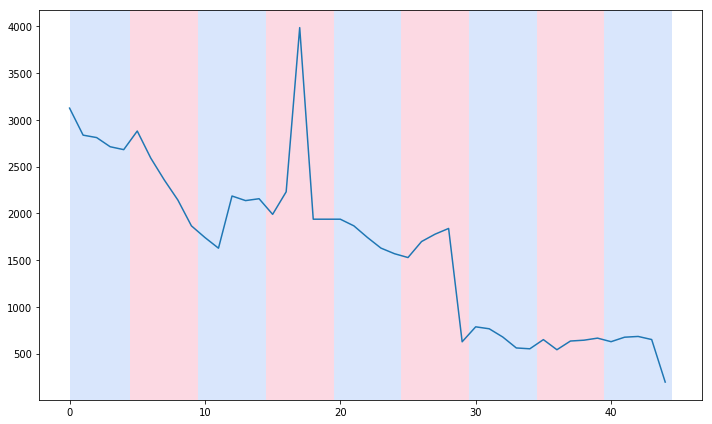

In [126]:
model = "l2"
A = data.SAFEACTS
points=np.array(data['UNSAFEACT'])
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x23609ff7c50>])

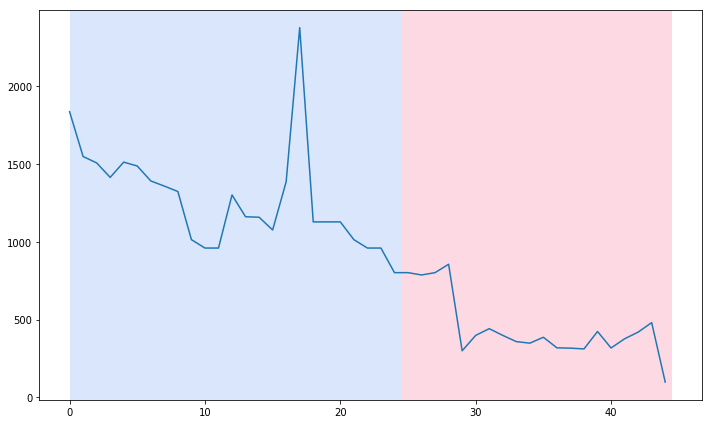

In [127]:
model="rbf"
points=np.array(data['SAFEACTS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x23609ffff98>])

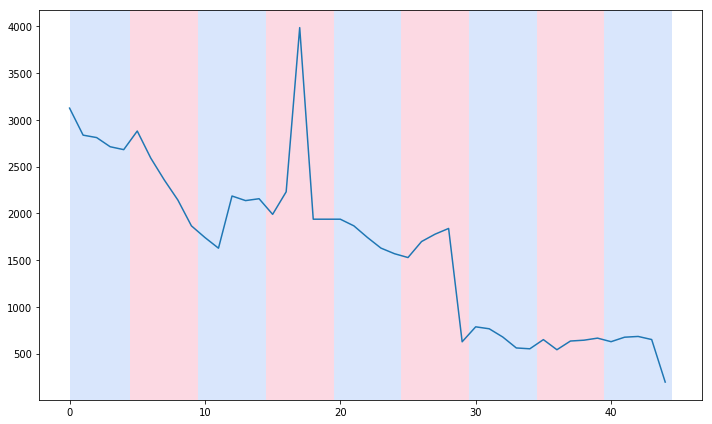

In [128]:
model = "l2"
points=np.array(data['UNSAFEACT'])
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360a2f4ef0>])

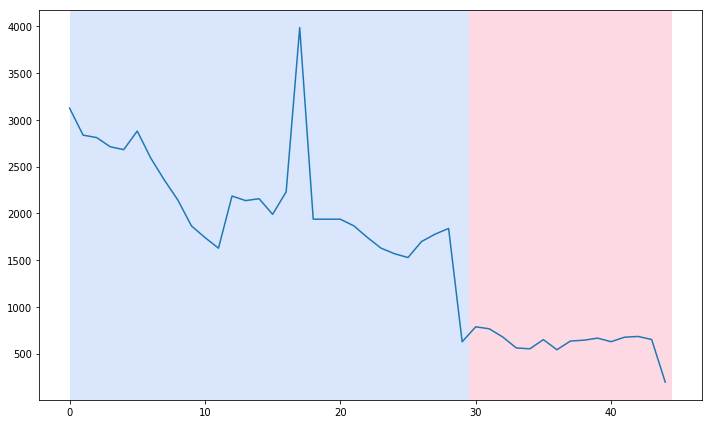

In [129]:
model="rbf"
points=np.array(data['UNSAFEACT'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360a3594e0>])

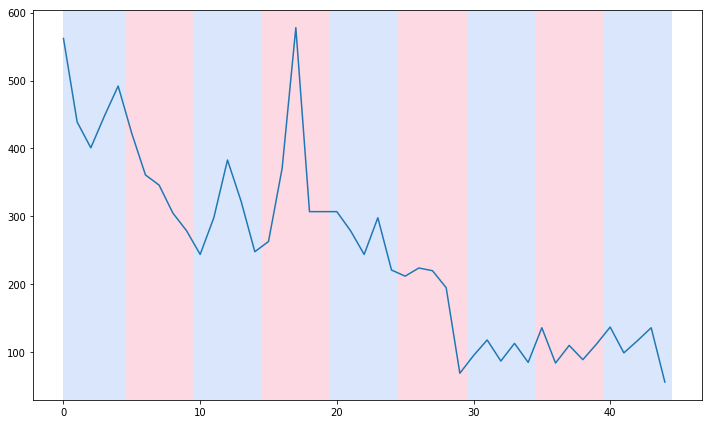

In [130]:
model="l2"
points=np.array(data['SAFECONDITIONS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x23609ff7710>])

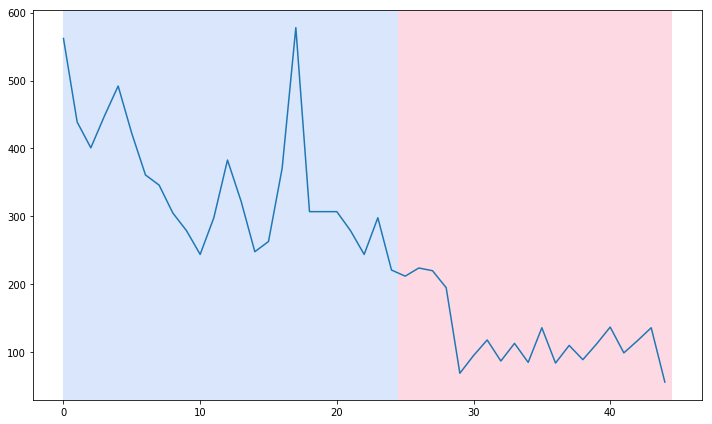

In [131]:
model="rbf"
points=np.array(data['SAFECONDITIONS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360acfef60>])

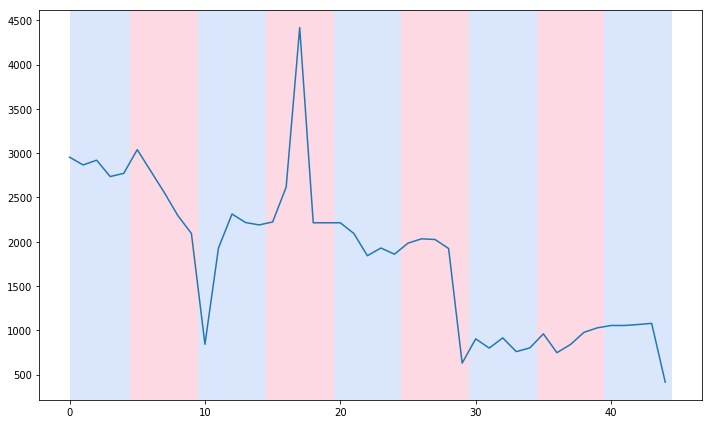

In [132]:
model="l2"
points=np.array(data['UNSAFECONDITION'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360aaa4dd8>])

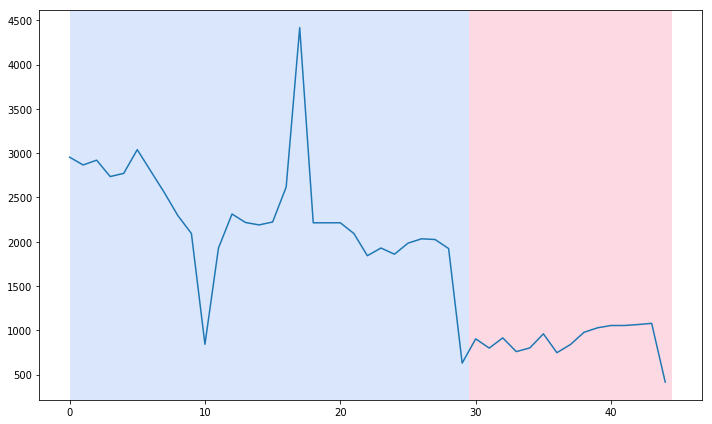

In [133]:
model="rbf"
points=np.array(data['UNSAFECONDITION'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360aaf7160>])

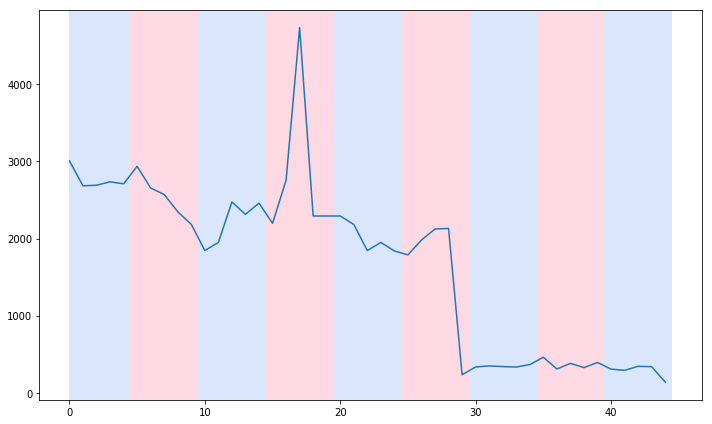

In [134]:
model="l2"
points=np.array(data['PROCEDURE'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360ab791d0>])

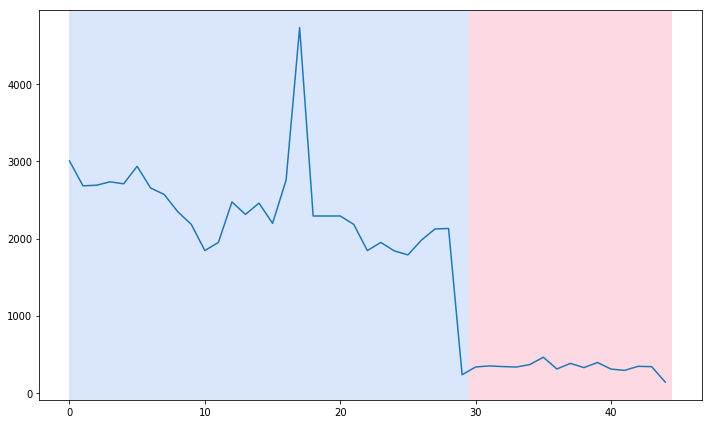

In [135]:
model="rbf"
points=np.array(data['PROCEDURE'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360ae79b00>])

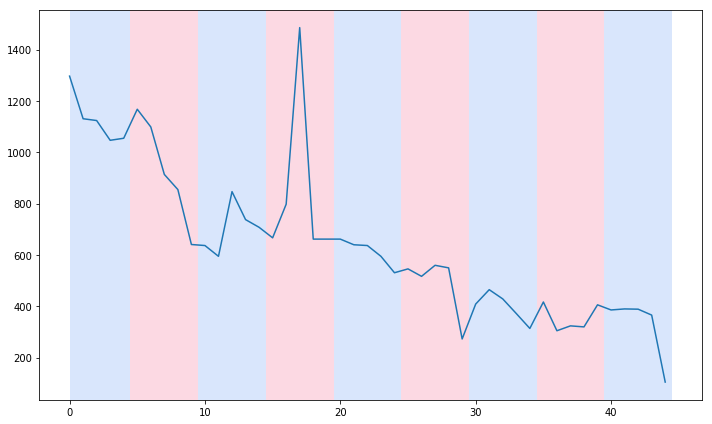

In [136]:
model="l2"
points=np.array(data['PPE'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360aeeaba8>])

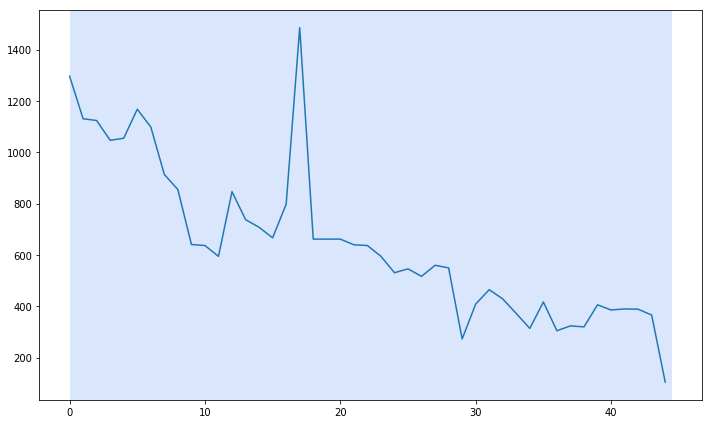

In [137]:
model="rbf"
points=np.array(data['PPE'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360af45a20>])

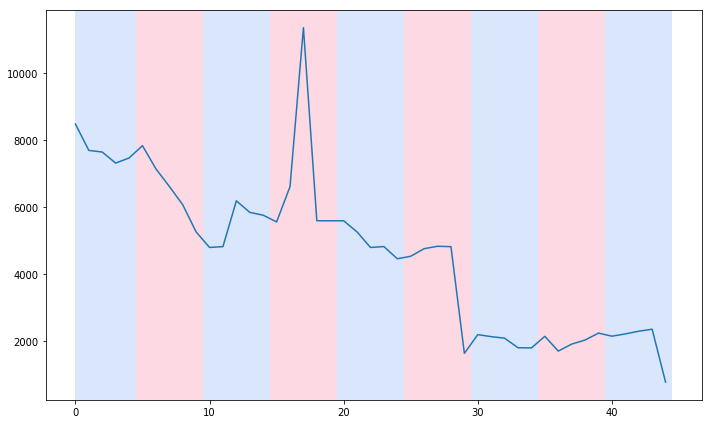

In [138]:
model="l2"
points=np.array(data['SAFETYOBSERVATIONS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360c325e80>])

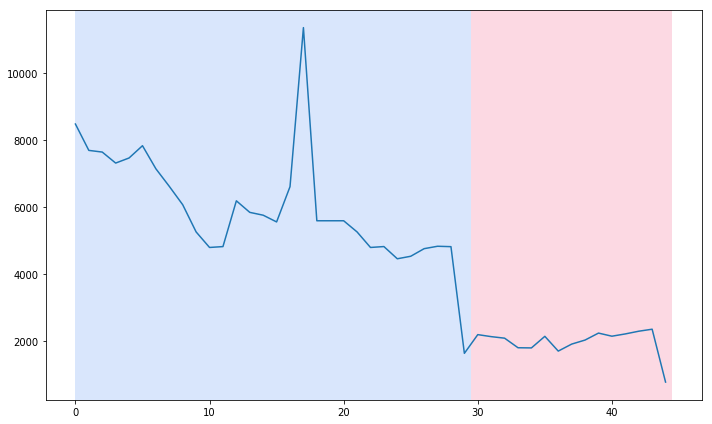

In [139]:
model="rbf"
points=np.array(data['SAFETYOBSERVATIONS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360c36acf8>])

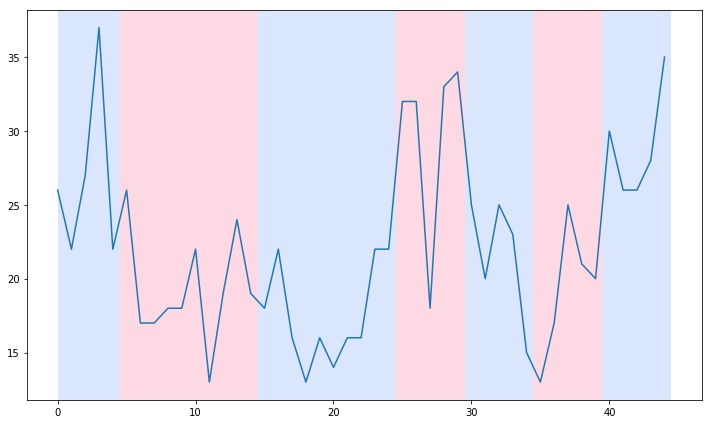

In [140]:
model="l2"
points=np.array(data['TRIFR'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360c3c8358>])

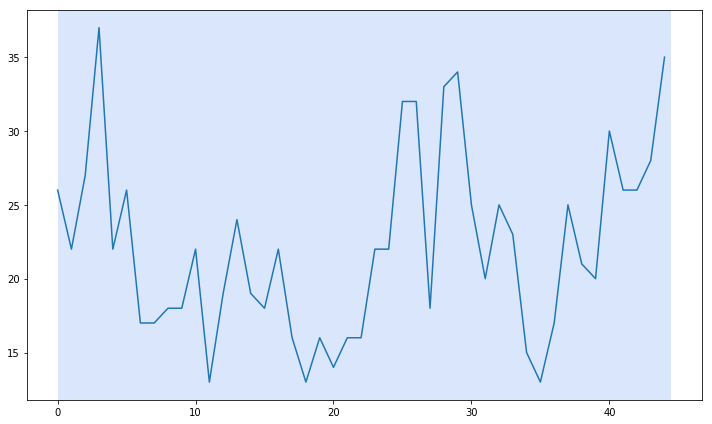

In [141]:
model="rbf"
points=np.array(data['TRIFR'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360c325320>])

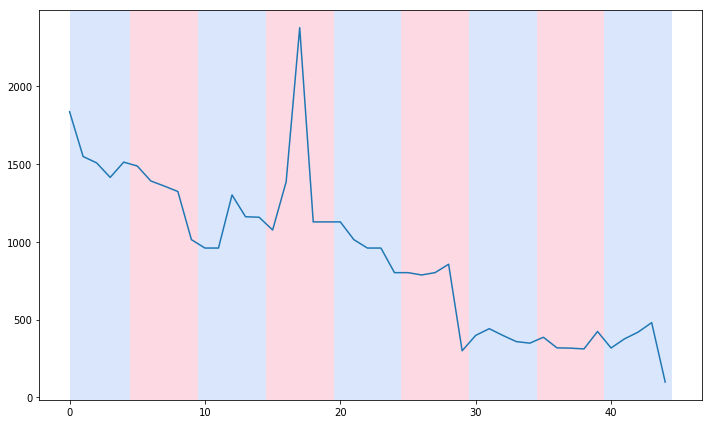

In [142]:
model="l2"
points=np.array(data['SAFEACTS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2360c438208>])

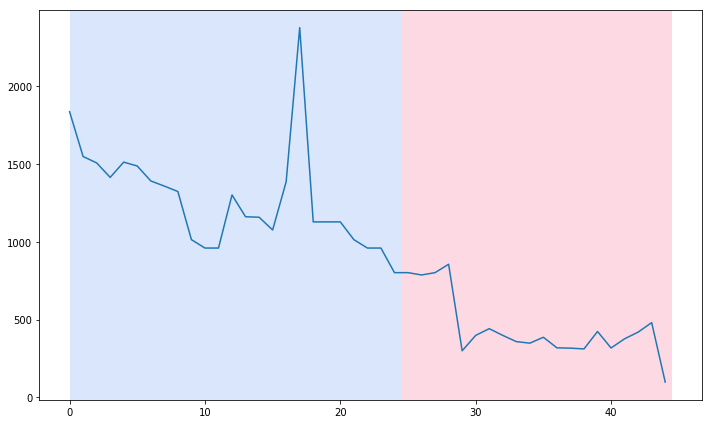

In [143]:
model="rbf"
points=np.array(data['SAFEACTS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

<h3>Maximum Likelihood Estimation Calculations</h3>

In [144]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data =

In [145]:
data = data_l1n

In [146]:
data.shape

(45, 8)

In [189]:
row=[]
for i in range(25):
    row.append(data[i][7])

In [190]:
col=[]
for i in range(25):
    col.append(data[i][0])
sm.OLS(col,row).fit().summary()
#MLE between Safeacts and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              309.1
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    3.26e-15
Time:                        20:23:37   Log-Likelihood:                          60.642
No. Observations:                  25   AIC:                                     -119.3
Df Residuals:                      24   BIC:                                     -118.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            57.2652      3.257     17.582      0.000      50.543      63.988
==============================================================================
Omnibus:                        2.425   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.347
Skew:                          -0.556   Prob(JB):                        0.510
Kurtosis:                       3.240   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
row=[]
for i in range(25,45):
    row.append(data[i][7])

In [192]:
col=[]
for i in range(25,45):
    col.append(data[i][0])
sm.OLS(col,row).fit().summary()
#MLE between Safeacts and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.598
Method:                 Least Squares   F-statistic:                              30.73
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    2.40e-05
Time:                        20:23:38   Log-Likelihood:                          33.048
No. Observations:                  20   AIC:                                     -64.10
Df Residuals:                      19   BIC:                                     -63.10
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.4050      1.697      5.544      0.000       5.854      12.956
==============================================================================
Omnibus:                       40.654   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.536
Skew:                          -3.244   Prob(JB):                     1.49e-27
Kurtosis:                      13.303   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
row=[]
for i in range(25):
    row.append(data[i][7])

In [194]:
col=[]
for i in range(25):
    col.append(data[i][1])
sm.OLS(col,row).fit().summary()
#MLE between Safecondition and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              326.5
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    1.77e-15
Time:                        20:23:38   Log-Likelihood:                          93.589
No. Observations:                  25   AIC:                                     -185.2
Df Residuals:                      24   BIC:                                     -184.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.7549      0.872     18.069      0.000      13.955      17.555
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   1.310
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.139
Skew:                          -0.473   Prob(JB):                        0.566
Kurtosis:                       2.554   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
row=[]
for i in range(25,45):
    row.append(data[i][7])

In [196]:
col=[]
for i in range(25,45):
    col.append(data[i][1])
sm.OLS(col,row).fit().summary()
#MLE between Safecondition and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              54.78
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    5.22e-07
Time:                        20:23:39   Log-Likelihood:                          61.611
No. Observations:                  20   AIC:                                     -121.2
Df Residuals:                      19   BIC:                                     -120.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.0103      0.407      7.401      0.000       2.159       3.862
==============================================================================
Omnibus:                       28.254   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.703
Skew:                          -2.389   Prob(JB):                     1.61e-11
Kurtosis:                       9.068   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
row=[]
for i in range(29):
    row.append(data[i][7])

In [198]:
col=[]
for i in range(29):
    col.append(data[i][2])
sm.OLS(col,row).fit().summary()
#MLE between Unsafeact and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              210.9
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    1.46e-14
Time:                        20:23:39   Log-Likelihood:                          46.575
No. Observations:                  29   AIC:                                     -91.15
Df Residuals:                      28   BIC:                                     -89.78
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.2993      5.942     14.523      0.000      74.127      98.471
==============================================================================
Omnibus:                       10.900   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.606
Skew:                          -1.297   Prob(JB):                      0.00820
Kurtosis:                       4.104   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
row=[]
for i in range(29,45):
    row.append(data[i][7])

In [200]:
col=[]
for i in range(29,45):
    col.append(data[i][2])
sm.OLS(col,row).fit().summary()
#MLE between Unsafeact and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              30.57
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    5.79e-05
Time:                        20:23:39   Log-Likelihood:                          18.287
No. Observations:                  16   AIC:                                     -34.57
Df Residuals:                      15   BIC:                                     -33.80
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.9633      2.887      5.529      0.000       9.809      22.118
==============================================================================
Omnibus:                       37.174   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.817
Skew:                          -3.153   Prob(JB):                     2.82e-18
Kurtosis:                      12.026   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
row=[]
for i in range(29):
    row.append(data[i][7])

In [202]:
col=[]
for i in range(29):
    col.append(data[i][3])
sm.OLS(col,row).fit().summary()
#MLE between Unsafecondition and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              193.6
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    4.20e-14
Time:                        20:23:40   Log-Likelihood:                          43.255
No. Observations:                  29   AIC:                                     -84.51
Df Residuals:                      28   BIC:                                     -83.14
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            92.7128      6.663     13.915      0.000      79.064     106.361
==============================================================================
Omnibus:                        7.517   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.214
Skew:                          -1.114   Prob(JB):                       0.0447
Kurtosis:                       3.419   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
row=[]
for i in range(29,45):
    row.append(data[i][7])

In [204]:
col=[]
for i in range(29,45):
    col.append(data[i][3])
sm.OLS(col,row).fit().summary()
#MLE between Unsafecondition and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              42.71
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    9.44e-06
Time:                        20:23:40   Log-Likelihood:                          14.515
No. Observations:                  16   AIC:                                     -27.03
Df Residuals:                      15   BIC:                                     -26.26
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            23.8856      3.655      6.535      0.000      16.095      31.676
==============================================================================
Omnibus:                       28.932   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.398
Skew:                          -2.602   Prob(JB):                     3.77e-10
Kurtosis:                       9.166   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
row=[]
for i in range(29):
    row.append(data[i][7])

In [206]:
col=[]
for i in range(29):
    col.append(data[i][4])
sm.OLS(col,row).fit().summary()
#MLE between Procedure and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              218.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    9.55e-15
Time:                        20:23:41   Log-Likelihood:                          43.949
No. Observations:                  29   AIC:                                     -85.90
Df Residuals:                      28   BIC:                                     -84.53
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            96.1021      6.505     14.773      0.000      82.777     109.428
==============================================================================
Omnibus:                        7.335   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.669
Skew:                          -1.024   Prob(JB):                       0.0588
Kurtosis:                       3.705   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
row=[]
for i in range(29,45):
    row.append(data[i][7])

In [208]:
col=[]
for i in range(29,45):
    col.append(data[i][4])
sm.OLS(col,row).fit().summary()
#MLE between Procedure and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              32.77
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    4.02e-05
Time:                        20:23:41   Log-Likelihood:                          28.638
No. Observations:                  16   AIC:                                     -55.28
Df Residuals:                      15   BIC:                                     -54.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.6547      1.512      5.724      0.000       5.432      11.877
==============================================================================
Omnibus:                       21.303   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.126
Skew:                          -2.010   Prob(JB):                     5.77e-06
Kurtosis:                       7.475   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
row=[]
for i in range(29):
    row.append(data[i][7])

In [210]:
col=[]
for i in range(29):
    col.append(data[i][6])
sm.OLS(col,row).fit().summary()
#MLE between Safetyobservation and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              207.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    1.82e-14
Time:                        20:23:42   Log-Likelihood:                          16.541
No. Observations:                  29   AIC:                                     -31.08
Df Residuals:                      28   BIC:                                     -29.71
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           240.9669     16.739     14.396      0.000     206.679     275.255
==============================================================================
Omnibus:                        9.685   Durbin-Watson:                   0.769
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.213
Skew:                          -1.222   Prob(JB):                       0.0165
Kurtosis:                       3.909   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
row=[]
for i in range(29,45):
    row.append(data[i][7])

In [212]:
col=[]
for i in range(29,45):
    col.append(data[i][6])
sm.OLS(col,row).fit().summary()
#MLE between Safetyobservation and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              36.11
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    2.39e-05
Time:                        20:23:42   Log-Likelihood:                         0.85600
No. Observations:                  16   AIC:                                     0.2880
Df Residuals:                      15   BIC:                                      1.061
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            51.5785      8.583      6.010      0.000      33.285      69.872
==============================================================================
Omnibus:                       34.304   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.574
Skew:                          -2.956   Prob(JB):                     5.76e-15
Kurtosis:                      10.963   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
row=[]
for i in range(45):
    row.append(data[i][7])

In [214]:
col=[]
for i in range(45):
    col.append(data[i][5])
sm.OLS(col,row).fit().summary()
#MLE between PPE and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                              54.97
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    2.84e-09
Time:                        20:23:53   Log-Likelihood:                          79.780
No. Observations:                  45   AIC:                                     -157.6
Df Residuals:                      44   BIC:                                     -155.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.6897      1.442      7.414      0.000       7.784      13.595
==============================================================================
Omnibus:                       80.765   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1287.090
Skew:                          -4.663   Prob(JB):                    3.25e-280
Kurtosis:                      27.484   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""